Dvotes is a vector of D voteshares, like [.4, .45, ..., .7, .8].

# Question 1

Why is the seats-votes curve equivalent to the cumulative histogram of .5 - Dvotes + mean(Dvotes), as depicted below? I don't have a good sense of why, but I think the answer is probably straightforward.

A seats-votes curve is generated by adding a constant amount to Dvotes to see how many seats Democrats would win if the mean voteshare was something else.

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


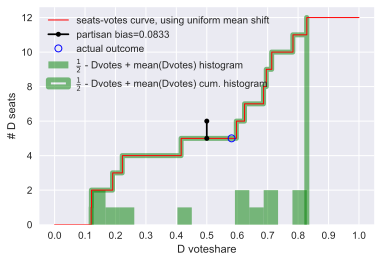

In [208]:
%load_ext autoreload
%autoreload 2

# Clone the gerrymandertests repo (https://github.com/PrincetonUniversity/gerrymandertests)
# and put this notebook in the root folder of the repo.

import plots as gerryplots
import metrics as m

import numpy as np
import scipy.stats as sps

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
%config InlineBackend.figure_format = 'svg'

N = 12 # number of districts

# Dvotes = sps.skewnorm.rvs(10, loc=.7, scale=.1, size=N) # skewed normal
Dvotes = np.random.rand(N) # uniform

fig, ax = gerryplots.plot_seats_votes_curve(Dvotes)

ax.hist(.5-Dvotes+np.mean(Dvotes), alpha=.5, bins=15, label='$\\frac{1}{2}$ - Dvotes + mean(Dvotes) histogram', color='green')
ax.hist(.5-Dvotes+np.mean(Dvotes), alpha=.5, bins=1000, cumulative=True, histtype='step', lw=5, color='green', label='$\\frac{1}{2}$ - Dvotes + mean(Dvotes) cum. histogram')
partisan_bias = m.partisan_bias(Dvotes)*N
ax.plot([.5, .5], [N/2, N/2-partisan_bias], 'ko-', label='partisan bias={:.3g}'.format(partisan_bias/N), markersize=5)
ax.plot(np.mean(Dvotes), sum(Dvotes>.5), 'bo', label='actual outcome', markerfacecolor='none', markeredgewidth=1, markeredgecolor='b')

ax.legend()

# Question 2

As a measure of gerrymandering, we sometimes compute partisan bias, the standard form of which is shown above. But there are alternative ways to compute partisan bias besides uniform additive swing. I've coded up two alternatives but I'm not sure if it actually matters in the computation of partisan bias. Can you come up with Dvotes where these metrics will give different measures of bias? If not, why does this not matter?

In [205]:
N = 1000

Dvotes = sps.skewnorm.rvs(10, loc=.7, scale=.1, size=N) # skewed normal
# Dvotes = np.random.rand(N) # uniform

print('''
PARTISAN BIAS UNDER SOME UNIFORM SWINGS
additive:           {add:.6}
additive iterative: {add_it:.6}
proportional:       {prop:.6}
'''.format(add    = m.partisan_bias(Dvotes, swing=m._uniform_additive_swing),
           add_it = m.partisan_bias(Dvotes, swing=m._uniform_additive_iterative_swing),
           prop   = m.partisan_bias(Dvotes, swing=m._uniform_proportional_swing)))


PARTISAN BIAS UNDER SOME UNIFORM SWINGS
additive:           0.072
additive iterative: 0.072
proportional:       0.072



# Question 3
Make seats-votes curves using the alternative swing types above.